In [1]:
#Load necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\Assignments\Machine Learning\New York Stock Exchange\prices.csv', header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,05-01-2016 00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,06-01-2016 00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,07-01-2016 00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,08-01-2016 00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,11-01-2016 00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [3]:
df1 = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\Assignments\Machine Learning\New York Stock Exchange\prices-split-adjusted.csv',index_col = "date",parse_dates = True)

In [4]:
df1

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [5]:
#Summary
df1.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [6]:
df3 = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\Assignments\Machine Learning\New York Stock Exchange\fundamentals.csv', parse_dates=['Period Ending'])
del df3['Unnamed: 0']
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Ticker Symbol                                        1781 non-null   object        
 1   Period Ending                                        1781 non-null   datetime64[ns]
 2   Accounts Payable                                     1781 non-null   float64       
 3   Accounts Receivable                                  1781 non-null   float64       
 4   Add'l income/expense items                           1781 non-null   float64       
 5   After Tax ROE                                        1781 non-null   float64       
 6   Capital Expenditures                                 1781 non-null   float64       
 7   Capital Surplus                                      1781 non-null   float64       
 8 

In [7]:
df4 = pd.read_csv(r'C:\Users\SWEEKRITHI SHETTY\Desktop\Assignments\Machine Learning\New York Stock Exchange\securities.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [8]:
#Securities
df4.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


# Data Preprocessing

In [9]:
print('There are {}  unique companies presents in the dataset'.format(df1['symbol'].nunique()))

There are 501  unique companies presents in the dataset


In [10]:
# Date range of the stock data
min_date, max_date = min(df['date']), max(df['date'])
print(f"Stoke data present from year {pd.Timestamp(min_date).year} to {pd.Timestamp(max_date).year}")

Stoke data present from year 2010 to 2015


In [11]:
df4[df4['Ticker symbol'] == 'AAPL'].head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
45,AAPL,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193


In [12]:
aapl = df1[df1['symbol'] == 'AAPL']

In [13]:
#Find max and min
min(aapl.index), max(aapl.index)

(Timestamp('2010-01-04 00:00:00'), Timestamp('2016-12-30 00:00:00'))

In [14]:
aapl.shape

(1762, 6)

In [15]:
aapl.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0


In [16]:
#Split train ,validation,test set
train_set = aapl[:int(aapl.shape[0] * 0.8)]
test_set = aapl[int(aapl.shape[0] * 0.6):]

In [17]:
print('Shape of training set: {}'.format(train_set.shape))
print('Shape of test set: {}'.format(test_set.shape))

Shape of training set: (1409, 6)
Shape of test set: (705, 6)


In [18]:
#Data Visualization

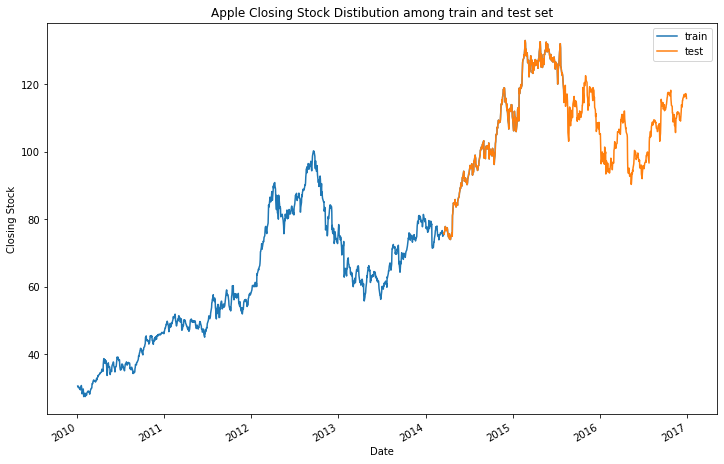

In [19]:
#Plot Apple Closing Stock distribution among train,validation,test set
plt.figure(figsize=(12,8))
ax = train_set['close'].plot(label='train')
ax = test_set['close'].plot(ax=ax, label='test')
plt.title('Apple Closing Stock Distibution among train and test set')
plt.xlabel('Date')
plt.ylabel('Closing Stock')
plt.legend()
plt.show()

In [20]:
df4.rename(columns={'Ticker symbol': 'Ticker Symbol'}, inplace=True)

In [21]:
# Merge df3 with securities
df3 = df3.merge(df4, on='Ticker Symbol')

In [22]:
# Create a new dataframe with fewer columns for analysis
listings_df = df3[['Ticker Symbol', 'Period Ending', 'Security', 'GICS Sector', 'Net Income']]
listings_df = listings_df.rename(columns={'Security': 'Company Name', 'GICS Sector': 'Sector'})
listings_df.head()

,Ticker Symbol,Period Ending,Company Name,Sector,Net Income
0,AAL,2012-12-31,American Airlines Group,Industrials,-1.876000e+09
1,AAL,2013-12-31,American Airlines Group,Industrials,-1.834000e+09
2,AAL,2014-12-31,American Airlines Group,Industrials,2.882000e+09
3,AAL,2015-12-31,American Airlines Group,Industrials,7.610000e+09
4,AAP,2012-12-29,Advance Auto Parts,Consumer Discretionary,3.876700e+08


In [23]:
## Let's find the name of different sectors 
all_sectors = listings_df['Sector'].unique().tolist()
print(f'List of all different sectors:\n {all_sectors}')

List of all different sectors:
 ['Industrials', 'Consumer Discretionary', 'Information Technology', 'Health Care', 'Consumer Staples', 'Utilities', 'Financials', 'Real Estate', 'Materials', 'Energy', 'Telecommunications Services']


In [24]:
listings_df.head()

,Ticker Symbol,Period Ending,Company Name,Sector,Net Income
0,AAL,2012-12-31,American Airlines Group,Industrials,-1.876000e+09
1,AAL,2013-12-31,American Airlines Group,Industrials,-1.834000e+09
2,AAL,2014-12-31,American Airlines Group,Industrials,2.882000e+09
3,AAL,2015-12-31,American Airlines Group,Industrials,7.610000e+09
4,AAP,2012-12-29,Advance Auto Parts,Consumer Discretionary,3.876700e+08


In [25]:
netincome = pd.DataFrame(listings_df.groupby(['Ticker Symbol', 'Period Ending'])['Company Name', 'Net Income', 'Sector'].max(), 
                                    columns=['Company Name', 'Net Income', 'Sector'])

<ipython-input-25-df30128a966d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  netincome = pd.DataFrame(listings_df.groupby(['Ticker Symbol', 'Period Ending'])['Company Name', 'Net Income', 'Sector'].max(),


In [26]:
#Groupby :IT companies
netincome

Company Name    Net Income  \
Ticker Symbol Period Ending                                          
AAL           2012-12-31     American Airlines Group -1.876000e+09   
              2013-12-31     American Airlines Group -1.834000e+09   
              2014-12-31     American Airlines Group  2.882000e+09   
              2015-12-31     American Airlines Group  7.610000e+09   
AAP           2012-12-29          Advance Auto Parts  3.876700e+08   
...                                              ...           ...   
ZION          2015-12-31               Zions Bancorp  3.094710e+08   
ZTS           2013-12-31                      Zoetis  5.040000e+08   
              2014-12-31                      Zoetis  5.830000e+08   
              2015-12-31                      Zoetis  3.390000e+08   
              2016-12-31                      Zoetis  8.210000e+08   

                                             Sector  
Ticker Symbol Period Ending                          
AAL           2012-12-31                Industrials  
              2013-12-31                Industrials  
              2014-12-31                Industrials  
              2015-12-31                Industrials  
AAP           2012-12-29     Consumer Discretionary  
...                                             ...  
ZION          2015-12-31                 Financials  
ZTS           2013-12-31                Health Care  
              2014-12-31                Health Care  
              2015-12-31                Health Care  
              2016-12-31                Health Care  

[1781 rows x 3 columns]

In [27]:
netincome_2015 = netincome.loc[pd.DatetimeIndex(netincome.index.get_level_values('Period Ending')).year == 2015]
netincome_2015.index = netincome_2015.index.droplevel('Period Ending')

In [28]:
netincome_2015 = netincome_2015.sort_values(by='Net Income', ascending=False)
netincome_2015.head(10)

,Company Name,Net Income,Sector
Ticker Symbol,,,
AAPL,Apple Inc.,5.339400e+10,Information Technology
JPM,JPMorgan Chase & Co.,2.444200e+10,Financials
WFC,Wells Fargo,2.289400e+10,Financials
GILD,Gilead Sciences,1.810800e+10,Health Care
VZ,Verizon Communications,1.787900e+10,Telecommunications Services
C,Citigroup Inc.,1.724200e+10,Financials
WMT,Wal-Mart Stores,1.636300e+10,Consumer Staples
XOM,Exxon Mobil Corp.,1.615000e+10,Energy
BAC,Bank of America Corp,1.588800e+10,Financials


In [29]:
#group into different sectors
netincome_2015.groupby('Sector').sum()

,Net Income
Sector,
Consumer Discretionary,9.336904e+10
Consumer Staples,7.466840e+10
Energy,-6.220540e+10
Financials,1.583301e+11
Health Care,8.486874e+10
Industrials,9.929444e+10
Information Technology,1.588277e+11
Materials,9.919130e+09
Real Estate,1.532994e+10


In [30]:
import seaborn as sns
sns.set_style('darkgrid')

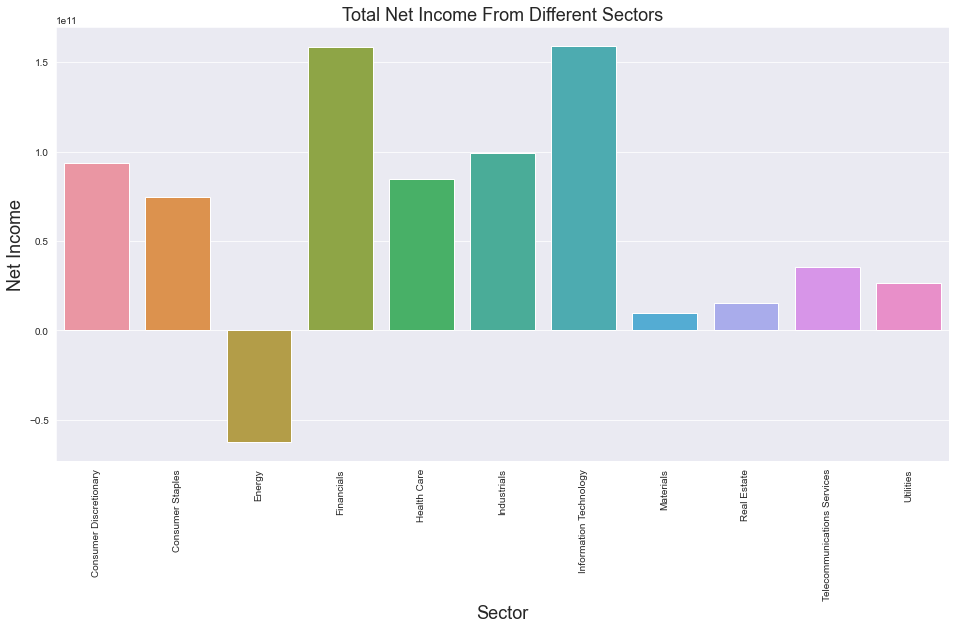

In [31]:
#Plotted graph for Total Net Income for Different Sectors
plt.figure(figsize=(16, 8))
df7 = netincome_2015.groupby('Sector').sum()
sns.barplot(data=df7, x=df7.index, y='Net Income')
plt.xticks(rotation='vertical')
plt.xlabel('Sector', fontsize=18)
plt.ylabel('Net Income', fontsize=18)
plt.title('Total Net Income From Different Sectors', fontsize=18)
plt.show()

In [32]:
#summary
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1762 non-null   object 
 1   open    1762 non-null   float64
 2   close   1762 non-null   float64
 3   low     1762 non-null   float64
 4   high    1762 non-null   float64
 5   volume  1762 non-null   float64
dtypes: float64(5), object(1)
memory usage: 96.4+ KB


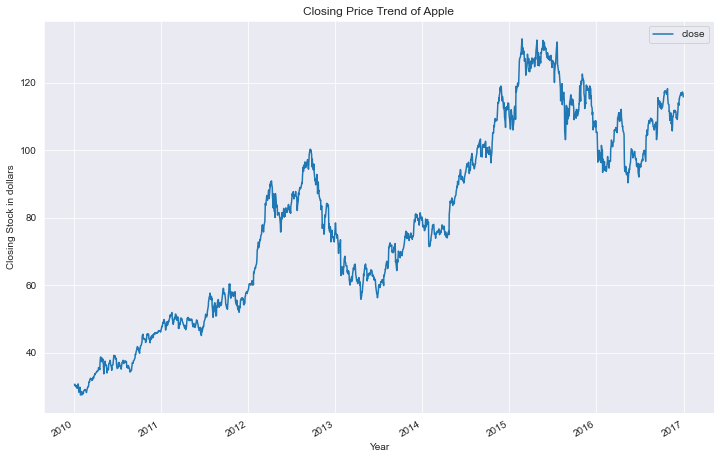

In [33]:
#Closing Price Trend of Apple
aapl[['close']].plot(figsize=(12,8))
plt.xlabel('Year')
plt.ylabel('Closing Stock in dollars')
plt.title('Closing Price Trend of Apple')
plt.show()

In [34]:
## list IT Companies in the watchlist
watchlist = ['AAPL', 'AAL', 'YHOO', 'GOOG', 'MSFT', 'ADBE']

# Create an empty datframe with aapl index
stocks_df = pd.DataFrame(index=aapl.index)
for ticker in watchlist:
    stocks_df[ticker] = df1.loc[df1['symbol'] == ticker, 'close']

stocks_df.head()

,AAPL,AAL,YHOO,GOOG,MSFT,ADBE
date,,,,,,
2010-01-04,30.572857,4.77,17.100000,312.205308,30.950001,37.090000
2010-01-05,30.625713,5.31,17.230000,310.830459,30.959999,37.700001
2010-01-06,30.138571,5.09,17.170000,302.994813,30.770000,37.619999
2010-01-07,30.082857,5.24,16.700001,295.941242,30.450001,36.889999
2010-01-08,30.282858,5.14,16.700001,299.886470,30.660000,36.689999


In [35]:
return_df = stocks_df.apply(lambda x: x.pct_change()[1:])
return_df.describe()

,AAPL,AAL,YHOO,GOOG,MSFT,ADBE
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.000893,0.001764,0.000647,0.000637,0.000502,0.000739
std,0.016518,0.030713,0.019162,0.015737,0.014607,0.017784
min,-0.123558,-0.158182,-0.087127,-0.083775,-0.113995,-0.190346
25%,-0.007550,-0.015152,-0.009837,-0.006928,-0.007415,-0.008056
50%,0.000759,0.001099,0.000545,0.000246,0.000000,0.000455
75%,0.010328,0.017517,0.011154,0.008456,0.008083,0.009676
max,0.088741,0.173167,0.103423,0.160524,0.104522,0.127801


In [36]:
# Find the correction matrix 
corr_df = return_df.corr()
corr_df

,AAPL,AAL,YHOO,GOOG,MSFT,ADBE
AAPL,1.000000,0.256286,0.306035,0.411582,0.389849,0.334466
AAL,0.256286,1.000000,0.275761,0.251567,0.273531,0.317640
YHOO,0.306035,0.275761,1.000000,0.423806,0.379028,0.383016
GOOG,0.411582,0.251567,0.423806,1.000000,0.470838,0.418770
MSFT,0.389849,0.273531,0.379028,0.470838,1.000000,0.468241
ADBE,0.334466,0.317640,0.383016,0.418770,0.468241,1.000000


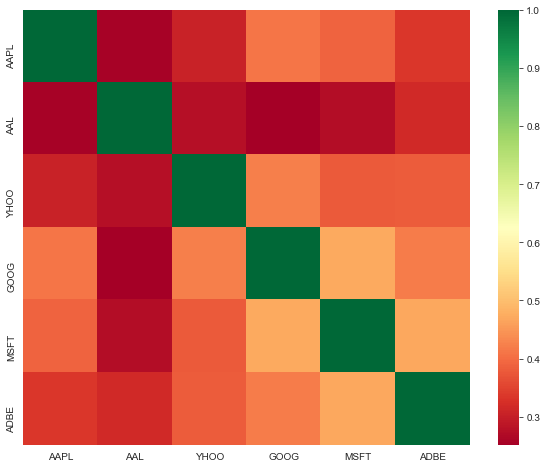

In [37]:
# Plotted  heatmap to find correlation between IT companies
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, cmap='RdYlGn')
plt.show()

In [38]:
# Create variable 'Close_tomorrow' which shifts 'Close' up by 1
df['Close_tomorrow'] = df['close'].shift(-1,fill_value=0)

# drop last row because we shifted value 
df.drop(df.tail(1).index,inplace=True) 

In [39]:
# Check out variables
df.dtypes

# We see Date as an object, so we have to convert it to datetime
df['date'] = df['date'].astype('datetime64[ns]')

In [40]:
# set Date as index
df = df.set_index('date')

In [41]:
df.drop('symbol', axis=1, inplace=True)

In [42]:
# Split data into train (80%) and test (20%)
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

Dimension of train data:  (681010, 6)
Dimension of test data:  (170253, 6)


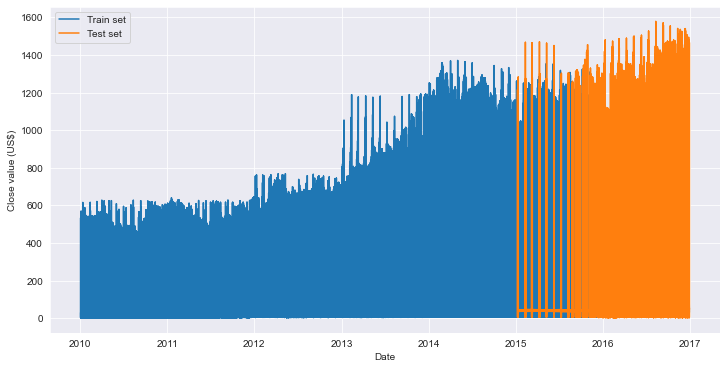

In [43]:
#Plotted train and test data considering close values  and dates
plt.figure(figsize = (12, 6))
plt.rcParams['figure.dpi'] = 360
plt.plot(train_dataset.Close_tomorrow)
plt.plot(test_dataset.Close_tomorrow)
plt.xlabel('Date')
plt.ylabel('Close value (US$)')
plt.legend(['Train set', 'Test set'], loc='upper left')
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

# Model Implementation

In [44]:
#Split train data to X and y
X_train = train_dataset.drop('Close_tomorrow', axis = 1)
y_train = train_dataset.loc[:,['Close_tomorrow']]

# Split test data to X and y
X_test = test_dataset.drop('Close_tomorrow', axis = 1)
y_test = test_dataset.loc[:,['Close_tomorrow']]

In [45]:
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout , Activation
from tensorflow.keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

In [46]:
# Differentiate scaler for input and output
scaler_x = MinMaxScaler(feature_range = (-1,1))
scaler_y = MinMaxScaler(feature_range = (-1,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)


In [47]:
# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [48]:
def dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 10

X_test, y_test = dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (170243, 10, 5)
y_train.shape:  (681000, 1)
X_test.shape:  (170243, 10, 5)
y_test.shape:  (681000, 1)


In [49]:
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Second layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

In [ ]:
# Fit  LSTM and GRU model.
import keras.utils
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)

    # Set shuffle equal to False due to importance of order for this dataset
    history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2,
                    batch_size = 50, shuffle = False, callbacks = [early_stop])
    return history

history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)

Epoch 1/5
10896/10896 [==============================] - 137s 12ms/step - loss: 0.0125 - val_loss: 0.0177
Epoch 2/5
10896/10896 [==============================] - 88s 8ms/step - loss: 0.0109 - val_loss: 0.0170
Epoch 3/5
10896/10896 [==============================] - 210s 19ms/step - loss: 0.0105 - val_loss: 0.0175
Epoch 4/5
  137/10896 [..............................] - ETA: 12:16 - loss: 0.0057

In [ ]:
# inverse scaler_y to make predictions
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

# Prediction

In [ ]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)

In [ ]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    plt.rcParams['figure.dpi'] = 360
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Close value (USD $)')
   
    
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)


# Evaluating model

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')


evaluate(prediction_lstm, y_test, 'LSTM')
evaluate(prediction_gru, y_test, 'GRU')